In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import os
import string
from src.data_loading import load_imdb_dataset
from src.utils.nltk_utils import download_nltk_resources

# NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

download_nltk_resources()

# Charger le dataset
# df = load_imdb_dataset()
df = pd.read_csv("Data/aclImdb_prepared.csv")
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\pc\OneDrive\Documents\ENSAE\ML For NLP\Final
[nltk_data]     Project\NLP-Sentiment-Classification\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\pc\OneDrive\Documents\ENSAE\ML For NLP\Final
[nltk_data]     Project\NLP-Sentiment-Classification\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Users\pc\OneDrive\Documents\ENSAE\ML For NLP\Final
[nltk_data]     Project\NLP-Sentiment-Classification\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,label,rating,split,file
0,Bromwell High is a cartoon comedy. It ran at t...,1,9,train,0_9.txt
1,Homelessness (or Houselessness as George Carli...,1,8,train,10000_8.txt
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,10,train,10001_10.txt
3,This is easily the most underrated film inn th...,1,7,train,10002_7.txt
4,This is not the typical Mel Brooks film. It wa...,1,8,train,10003_8.txt


In [19]:
print("Nombre total d'exemples :", len(df))
print("Répartition train/test :")
print(df['split'].value_counts())

print("\nRépartition pos/neg :")
print(df['label'].value_counts())

Nombre total d'exemples : 50000
Répartition train/test :
split
train    25000
test     25000
Name: count, dtype: int64

Répartition pos/neg :
label
1    25000
0    25000
Name: count, dtype: int64


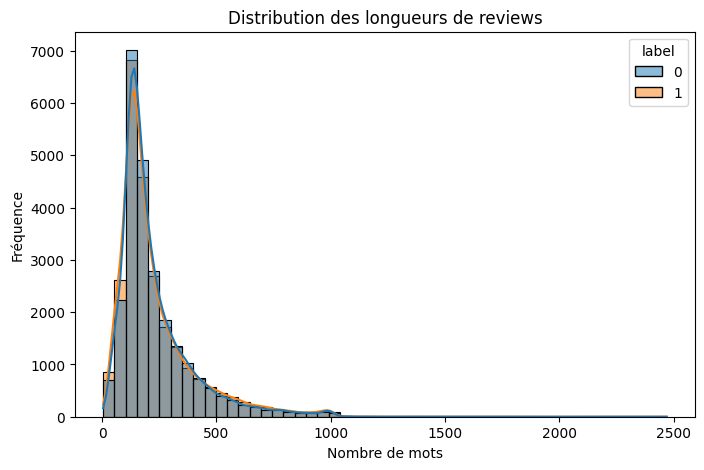

In [20]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='review_length', hue='label', bins=50, kde=True)
plt.title("Distribution des longueurs de reviews")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.show()

La majorité des critiques sont comprises entre 100 et 400 mots.

Pour l’entraînement des modèles, il peut être pertinent de :

fixer une longueur max (~512 mots pour BERT)

utiliser du padding/truncation pour standardiser les inputs

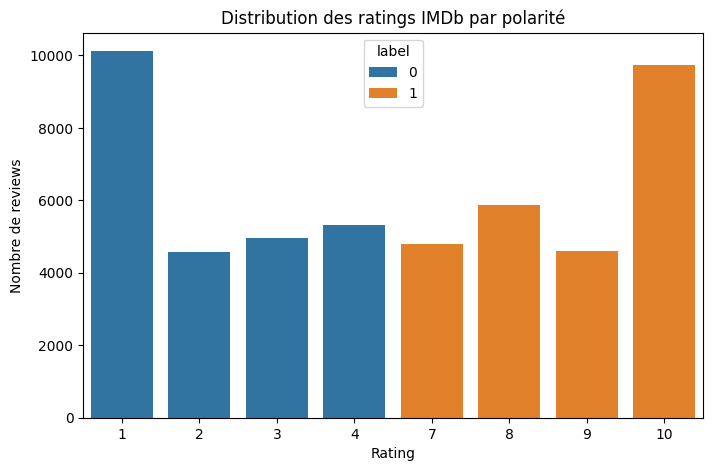

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rating', hue='label')
plt.title("Distribution des ratings IMDb par polarité")
plt.xlabel("Rating")
plt.ylabel("Nombre de reviews")
plt.show()

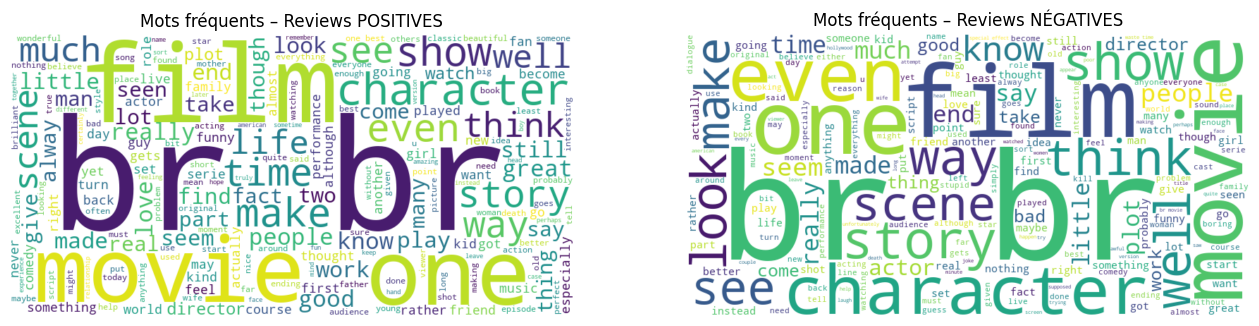

In [17]:
stop_words = set(stopwords.words('english') + list(string.punctuation))

def get_clean_text(series):
    text = " ".join(series)
    tokens = word_tokenize(text.lower())
    return " ".join([word for word in tokens if word not in stop_words and word.isalpha()])

# Wordcloud positifs
text_pos = get_clean_text(df[df['label'] == 1]['text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(text_pos)

# Wordcloud négatifs
text_neg = get_clean_text(df[df['label'] == 0]['text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(text_neg)

# Affichage
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Mots fréquents – Reviews POSITIVES")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Mots fréquents – Reviews NÉGATIVES")
plt.show()

Positifs : mots comme great, beautiful, wonderful, well, amazing apparaissent dans les plus visibles

Négatifs : on voit boring, bad, worst, waste, nothing, poor, terrible, disappointing…

Implications :

Les wordclouds confirment une forte polarisation lexicale entre les classes.

Ce vocabulaire va probablement être fortement discriminant dans les modèles BoW et même les embeddings.

🧽 On pourra affiner le prétraitement pour supprimer : les balises HTML (br)

les tokens trop fréquents ou peu informatifs (one, thing, etc.)